<h1 style="text-align: center;">Mini-projet</h1>

<h2>Objectif:</h2>

L'objectif de ce projet est d'appliquer les méthodes de preprocessing sur une dataset pour qu'elle soit prête pour appliquer les modèles d'apprentissage automatique.Dans ce projet on a choisit de travailler sur une dataset qui contient plusieurs facteurs en relation avec l'état de santé dans 193 pays qui est crée par WHO (World Health Organization), cette dataset contient les données de 15 (depuis 2000 jusqu'à 2015). notre rôle c'est de savoir manipuler les valeurs maquantes de la dataset et faire des visualisations qui vont nous aider à selectionner les meilleurs modèles.

In [54]:
import pandas as pd
df = pd.read_csv('/home/noureddine/Desktop/datasets/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [56]:
#Changer le type de l'atrribut 'Year' à datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

<h2>Les valeurs manquantes</h2>

In [57]:
# Les valeurs manquantes
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

il y a 2938 instance dans cette dataset, Ce qui veut dire qu'il est assez petit normes d'apprentissage automatique, mais c'est parafait pour commencer. On remarque que des attributs comme 'GDP', 'Income composition of resources' contiennent des valeurs nulles donc il ya un manque de valeurs. Nous devrons nous en occuper plus tard.

Tout les attributs sont numériques sauf les deux attributs 'Country' et 'Status' qui sont de type <strong>object</strong>.D'après l'observation des cinque premières lignes on remarque que les valeurs de 'Country' et 'Status' sont répètitives, car ils sont des attributs catégoriques.


In [58]:
#Découvrir les catégories existantes de 'Status'
df["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [59]:
#Observation des champs nummériques
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007-07-09 14:07:55.425459456,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
min,2000-01-01 00:00:00,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004-01-01 00:00:00,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008-01-01 00:00:00,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012-01-01 00:00:00,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015-01-01 00:00:00,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000
std,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920


La ligne <strong>std</strong> montre l'écart type, qui mesure la disertion des valeurs . Les lignes 25 %, 50 % et 75 % montrent les centiles correspondants : un centile indiquant indique la valeur en dessous de laquelle un pourcentage donné d'observations dans un groupe d'observation tombe.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

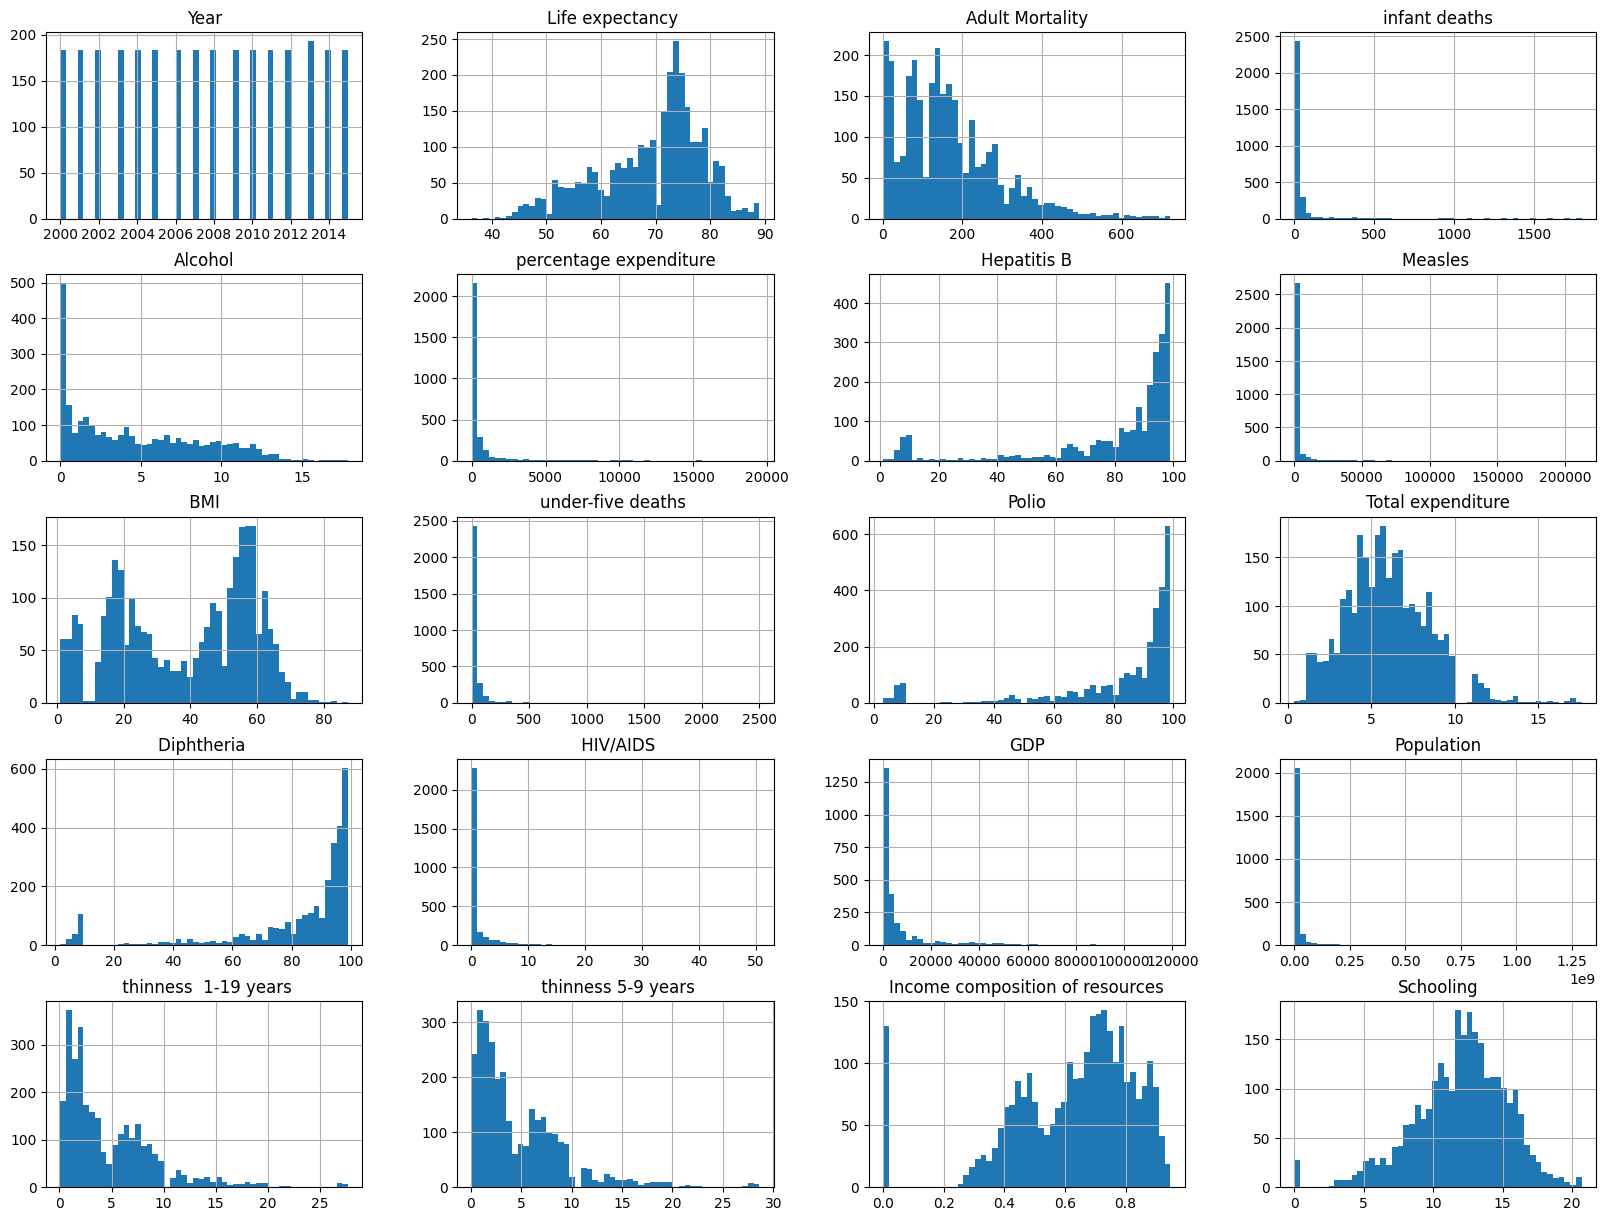

In [60]:
#Tracer un histogramme pour chaque attribut numérique
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20, 15))

<h2>carte thermique de corrélation</h2>

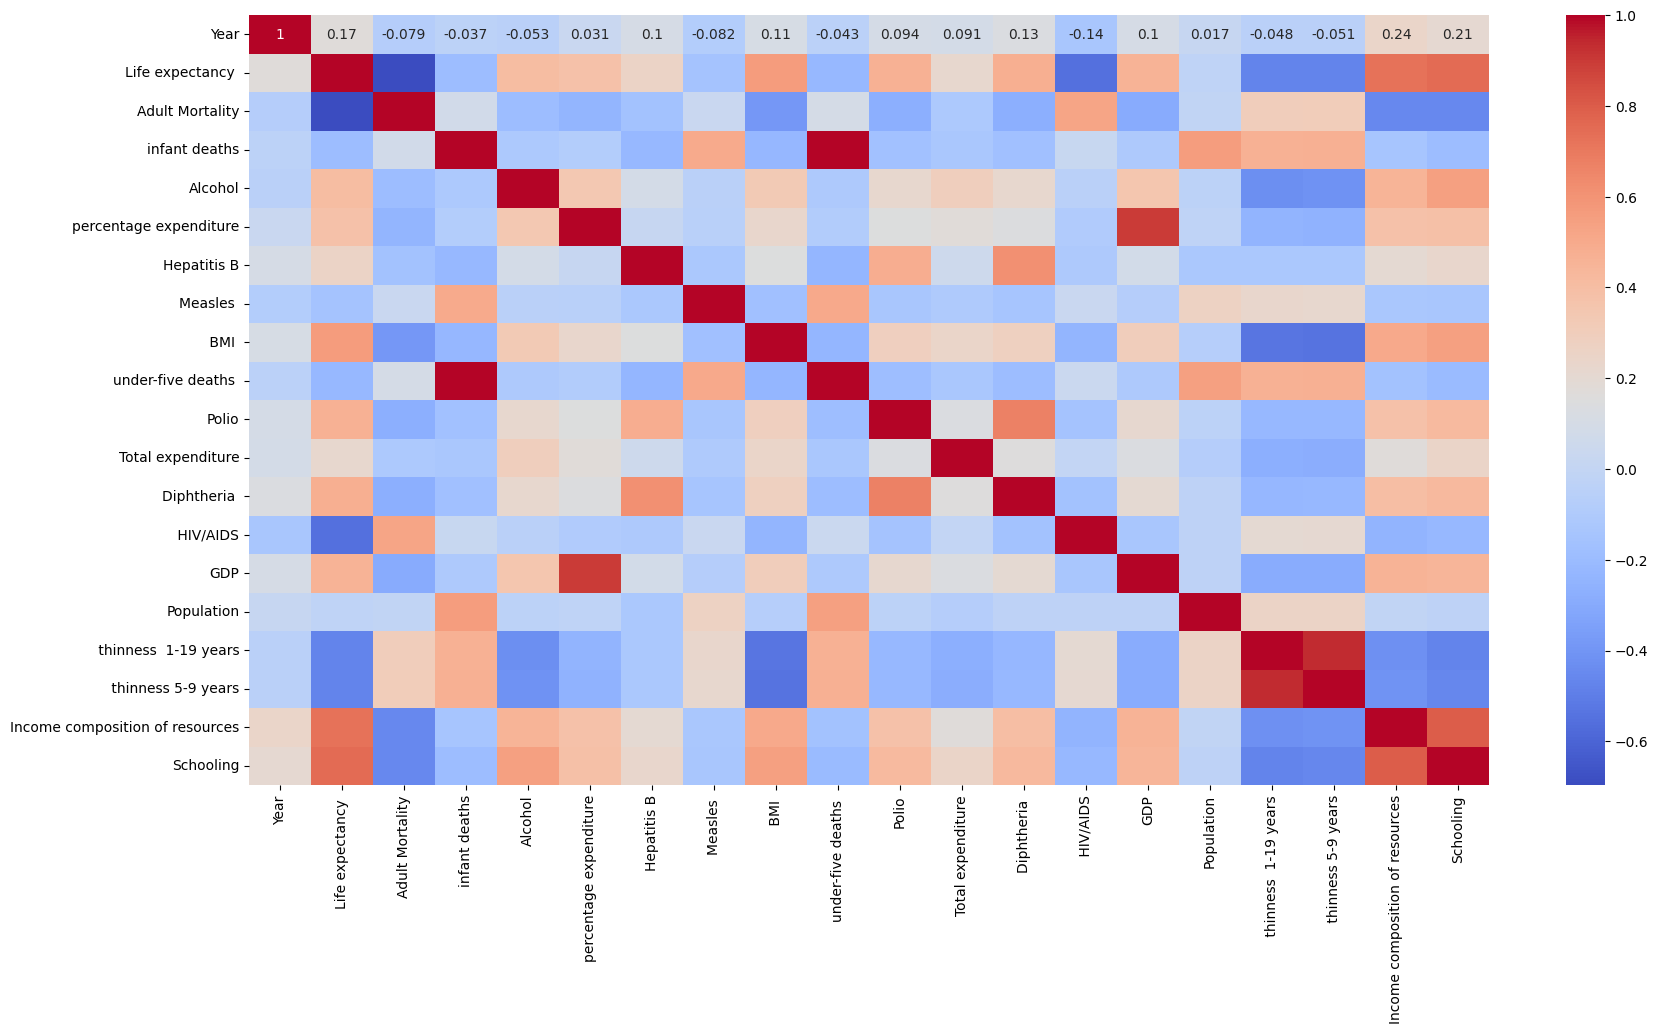

In [61]:
#Chercher des corrélations entre les données
import seaborn as sns
corr_data = df.drop(columns=['Country', 'Status'])
corr_matrix = corr_data.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Cette carte thermique de corrélation montre la corrélation entre les différents attributs de la dataset. On peut calculer spécifiquement la corrélation entre lattribut 'Life Expactancy' et lea autres attributs pour voir quels attributs ont une relation forte avec cet attribut.

In [62]:
corr_matrix['Life expectancy '].sort_values(ascending = False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170034
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

On remarque qu'il y a une corrélation positive forte entre l'epérence de vie et les trois attributs suivants:
<ul><li>Schooling: le nombre d'années d'éducation formelle qu'un individu reçoit en moyenne dans un pays ou une région particulière</li>
<li>Income composition of resources</li>
<li>BMI: Average Body Mass Index of entire population</li></ul>
alors qu'il ya une forte corrélation négative avec: 
<ul><li>Adult Mortality: number of deaths between 15 and 60 years</li>
<li>HIV/AIDS: number of individuals within a population who are living with HIV/AIDS</li></ul>

## Data cleaning:
<p>Avant d'appliquer des algorithmes de ML sur la dataset, il faut d'abord manipuler les valeurs manquantes. Pour cela on a trois options: <ul><li>supprimer les valeurs manquantes.</li>
                    <li>Supprimer tout l'attribut.</li>
                    <li>remplir par une valeur(zero, la moyenne, la médianne,etc).</li></ul></p>

In [63]:
#suppression totale des attributs qui ont une corrélation faible avec l'espérance de vie (Population, Hepatitis B, Total expenditure)
df = df.drop(["Population", "Hepatitis B", "Total expenditure"], axis = 1)
#Remplir le reste des valeurs manquantes par la médianne
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#on crée une copie de la dataset qui ne contient que les valeurs numériques
df_num = df.drop(["Country", "Status", "Year"], axis=1)
#On applique imputer sur la dataset en utilisant .fit()
imputer.fit(df_num)
imputer.statistics_
#Remplacer les valeurs manquante par la médianne .transform()
X = imputer.transform(df_num)
#mettre le résultat dans une dataframe
df_transformed = pd.DataFrame(X, columns = df_num.columns)

In [64]:
#Chercher des doublons
duplicate_rows = df_transformed[df_transformed.duplicated()]

On remarque qu'il y a pas de doublons dans notre dataset.

## Feature scaling:
<strong>Feature Scaling</strong> (ou mise à l'échelle des fonctionnalités) est l'une des transformations les plus importantes qu'on doit appliquer à notre données. Vu que, généralement les algorithmes d'apprentissage automatique ne performent pas bien lorsque les données numériques d'entrée ont des échelles différentes.

Il y'a deux méthodes communes pour mettre à la même échelle tout les attributs:<strong>la normalisation</strong> et <strong>la standardization</strong>

La normalisation est le processusutilisé pour mettre les valeurs vers une plage standarisée. Parmi les méthodes de normalisation on a <strong>Min-Max Scaling</strong> il edimensionne les valeurs d'une variable numérique dans une plage spécifique, souvent entre 0 et 1.

Sa formule est la suivante: (X-X(min))/(X(max)-X(min))

La standardisation centre les données autour de la moyenne (0) avec un écart-type de 1.

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_transformed)
scaled_df = pd.DataFrame(scaled_data, columns=df_transformed.columns) 
scaled_df = pd.concat([df[["Country", "Status", "Year"]], scaled_df], axis=1)
scaled_df

,Country,Status,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,2015-01-01,0.544592,0.362881,0.034444,0.000000,0.003659,0.005439,0.209733,0.0332,0.031250,0.649485,0.000000,0.004889,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,Developing,2014-01-01,0.447818,0.373961,0.035556,0.000000,0.003774,0.002319,0.203940,0.0344,0.572917,0.618557,0.000000,0.005127,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,Developing,2013-01-01,0.447818,0.369806,0.036667,0.000000,0.003759,0.002027,0.198146,0.0356,0.614583,0.639175,0.000000,0.005287,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,Developing,2012-01-01,0.440228,0.375346,0.038333,0.000000,0.004014,0.013135,0.192352,0.0372,0.666667,0.670103,0.000000,0.005608,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,Developing,2011-01-01,0.434535,0.379501,0.039444,0.000000,0.000364,0.014200,0.187717,0.0388,0.677083,0.680412,0.000000,0.000519,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,2004-01-01,0.151803,1.000000,0.015000,0.243561,0.000000,0.000146,0.302433,0.0168,0.666667,0.649485,0.663366,0.003799,0.336957,0.326316,0.429325,0.444444
2934,Zimbabwe,Developing,2003-01-01,0.155598,0.988920,0.014444,0.226764,0.000000,0.004703,0.297798,0.0164,0.041667,0.680412,0.724752,0.003790,0.351449,0.343860,0.440928,0.458937
2935,Zimbabwe,Developing,2002-01-01,0.161290,0.099723,0.013889,0.247480,0.000000,0.001433,0.293163,0.0160,0.729167,0.711340,0.786139,0.000467,0.039855,0.042105,0.450422,0.483092
2936,Zimbabwe,Developing,2001-01-01,0.170778,0.948753,0.013889,0.095745,0.000000,0.002493,0.288528,0.0156,0.760417,0.752577,0.831683,0.004589,0.054348,0.056140,0.450422,0.473430


## Handling outliers:

### Scatter plot

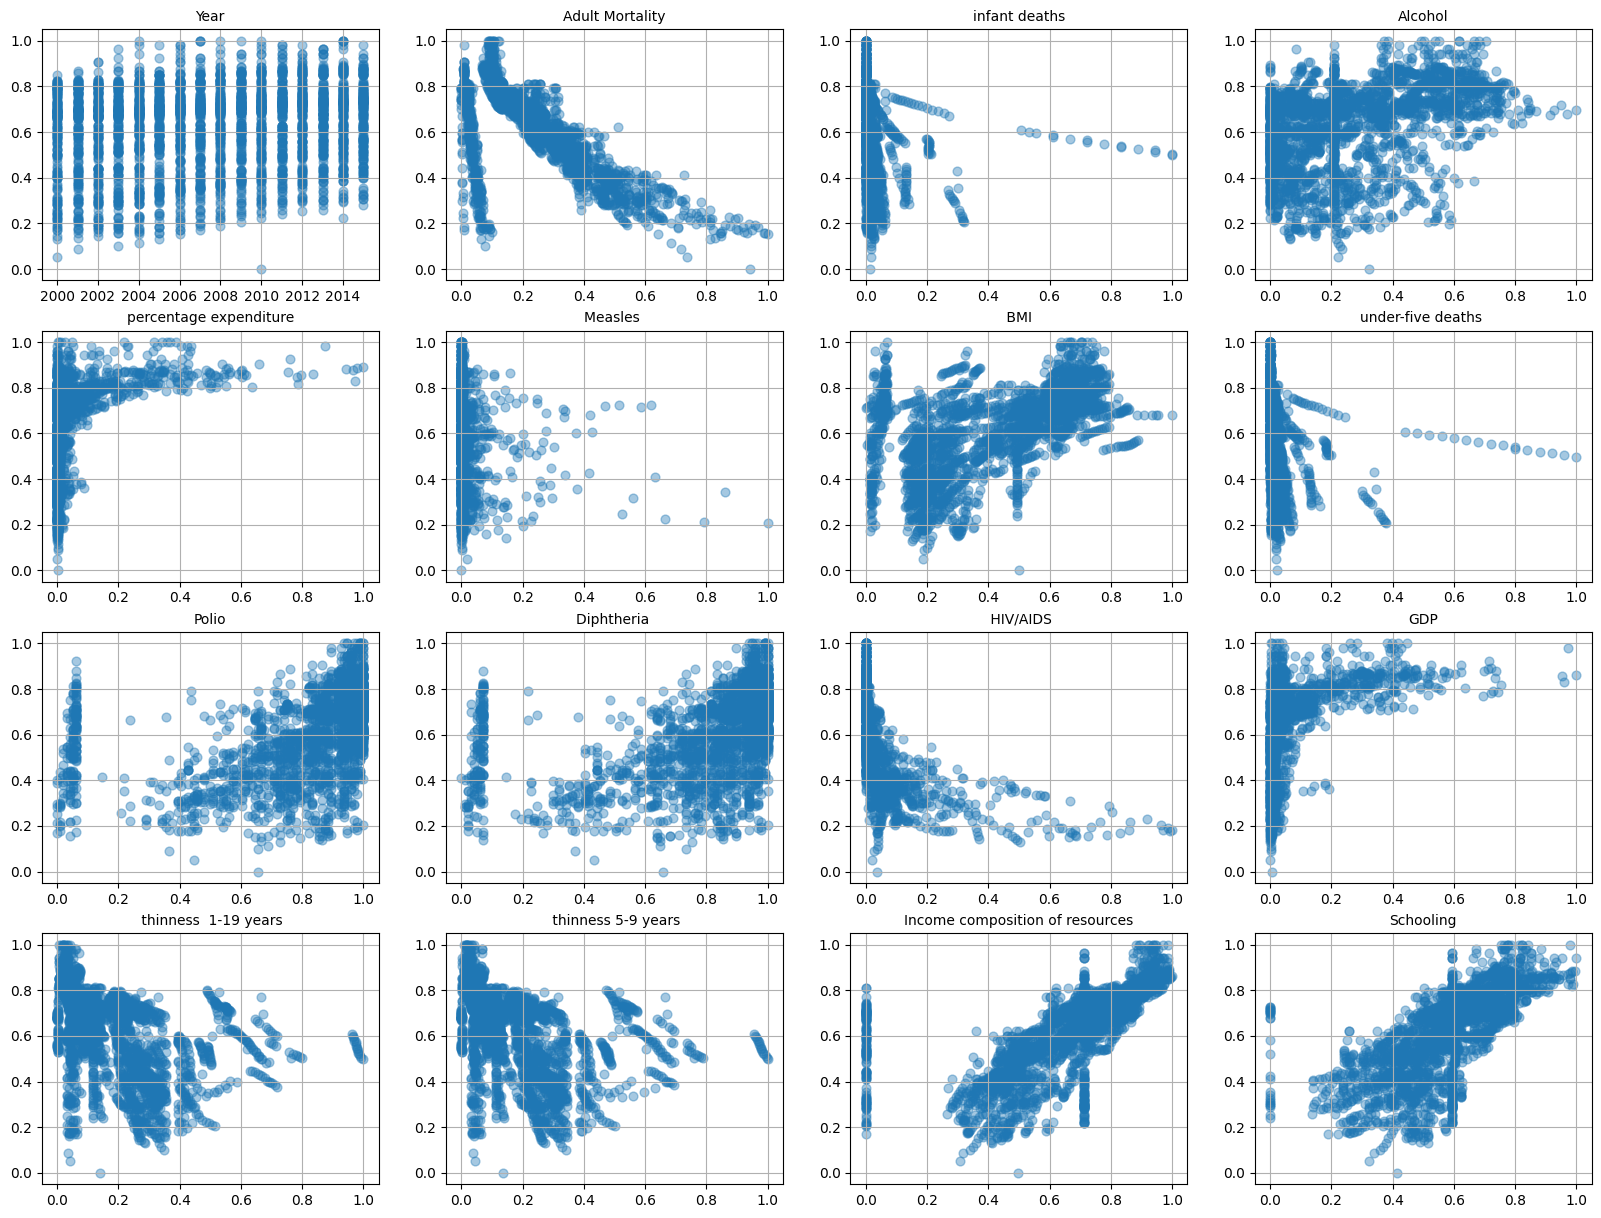

In [80]:
#Tracer la relation entre l'espérence de vie et les autres attributs pour voir s'il y a des valeurs aberrantes
import numpy as np
features_list = scaled_df.drop(columns = ["Country", "Status", 'Life expectancy ']).columns.tolist()
plt.figure(figsize=(20, 15))
for i in range(len(features_list)):
    plt.subplot(4, 4, i + 1)
    plt.scatter(np.array(scaled_df[features_list[i]]), np.array(scaled_df['Life expectancy ']), alpha = 0.4, s = 40)
    plt.title(features_list[i], fontsize = 10)
    plt.grid()
plt.show()

### Boxplot

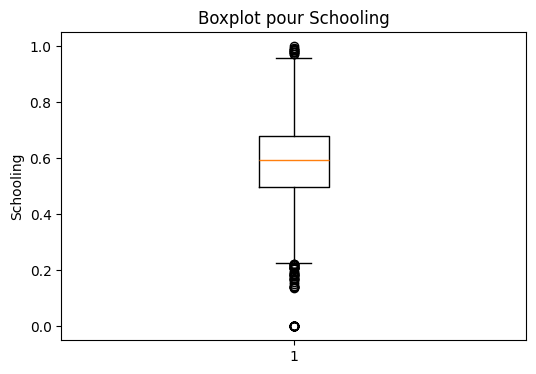

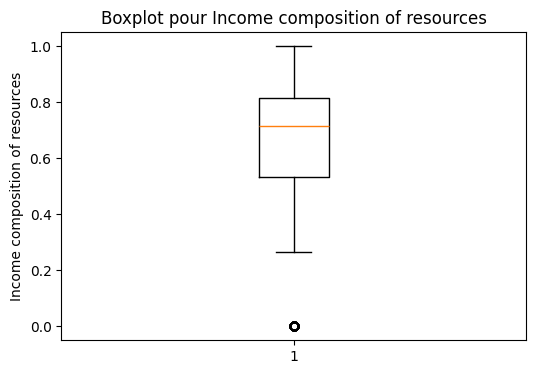

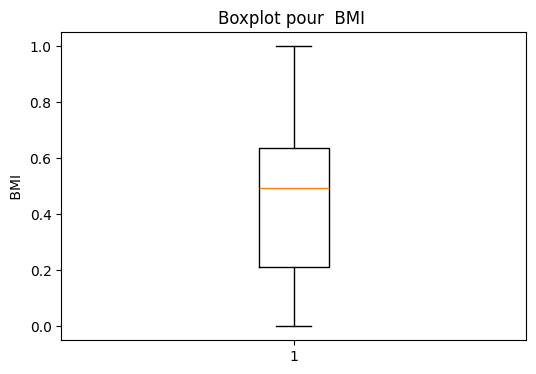

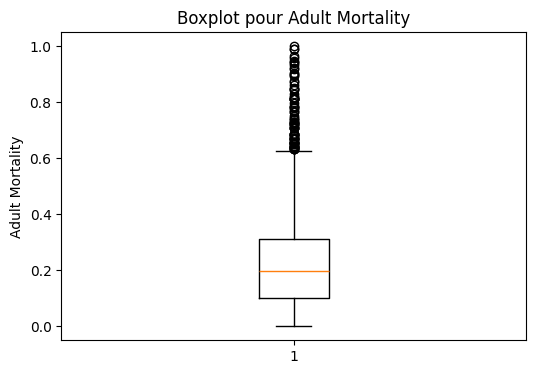

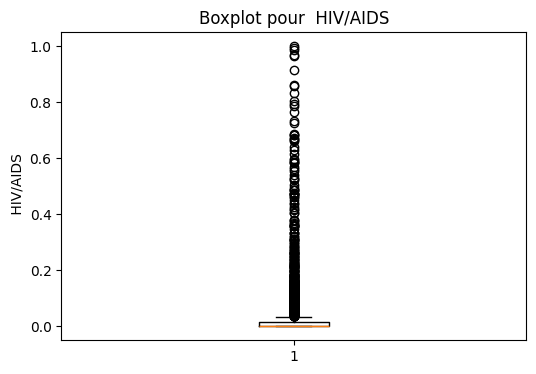

In [81]:
important_features = ['Schooling', 'Income composition of resources', ' BMI ', 'Adult Mortality', ' HIV/AIDS']
for i in range(len(important_features)):
    plt.figure(figsize=(6, 4)) # Ajuster la taille du plot si nécessaire
    plt.boxplot(scaled_df[important_features[i]])
    plt.ylabel(important_features[i])
    plt.title('Boxplot pour ' + important_features[i])
    plt.show()

Les points de données individuels au -delà des moustaches (les lignes qui s'étendent de la boîte aux observations les plus petites et les plus grandes dans une distance de 1.5 fois l'IQR des quartiles) sont considérés comme des valeurs aberrantes potentielles 

In [82]:
#Supprimer la valeurs aberrantes de 'Schooling' en se basant sur l'IQR

# Calculer Q1, Q3 et l'IQR
Q1 = scaled_df['Schooling'].quantile(0.25)
Q3 = scaled_df['Schooling'].quantile(0.75)
IQR = Q3 - Q1

# Définir le seuil pour les valeurs aberrantes
seuil = 1.5 * IQR

# Identifier les valeurs aberrantes
filtered_df = scaled_df[(scaled_df['Schooling'] >= Q1 - seuil) & (scaled_df['Schooling'] <= Q3 + seuil)]


In [84]:
#Supprimer la valeurs aberrantes de 'Adult Mortality' en se basant sur l'IQR

# Calculer Q1, Q3 et l'IQR
Q1 = filtered_df['Adult Mortality'].quantile(0.25)
Q3 = filtered_df['Adult Mortality'].quantile(0.75)
IQR = Q3 - Q1

# Définir le seuil pour les valeurs aberrantes
seuil = 1.5 * IQR

# Identifier les valeurs aberrantes
filtered_df = filtered_df[(filtered_df['Adult Mortality'] >= Q1 - seuil) & (filtered_df['Adult Mortality'] <= Q3 + seuil)]



Après la manipulation des valeurs aberrantes

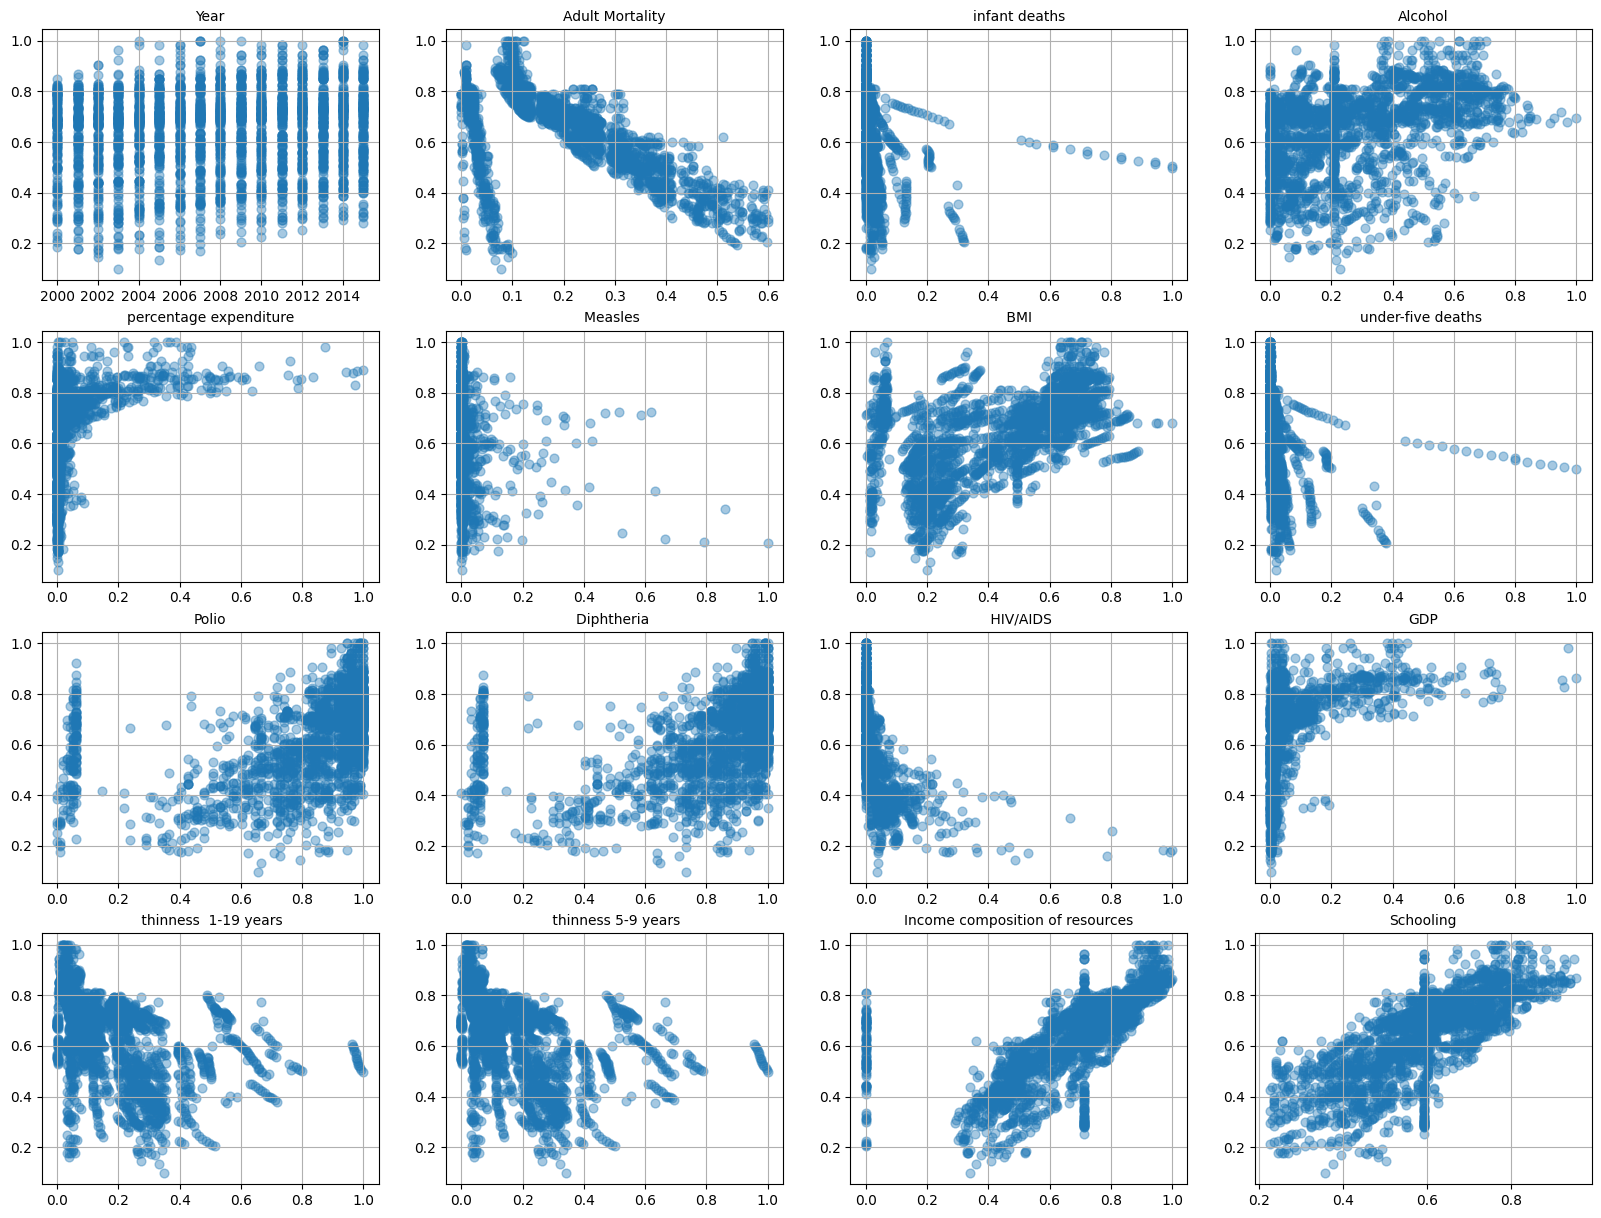

In [85]:
#Tracer la relation entre l'espérence de vie et les autres attributs pour voir s'il y a des valeurs aberrantes
import numpy as np
features_list = filtered_df.drop(columns = ["Country", "Status", 'Life expectancy ']).columns.tolist()
plt.figure(figsize=(20, 15))
for i in range(len(features_list)):
    plt.subplot(4, 4, i + 1)
    plt.scatter(np.array(filtered_df[features_list[i]]), np.array(filtered_df['Life expectancy ']), alpha = 0.4, s = 40)
    plt.title(features_list[i], fontsize = 10)
    plt.grid()
plt.show()

In [86]:
filtered_df

,Country,Status,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,2015-01-01,0.544592,0.362881,0.034444,0.000000,0.003659,0.005439,0.209733,0.0332,0.031250,0.649485,0.000000,0.004889,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,Developing,2014-01-01,0.447818,0.373961,0.035556,0.000000,0.003774,0.002319,0.203940,0.0344,0.572917,0.618557,0.000000,0.005127,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,Developing,2013-01-01,0.447818,0.369806,0.036667,0.000000,0.003759,0.002027,0.198146,0.0356,0.614583,0.639175,0.000000,0.005287,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,Developing,2012-01-01,0.440228,0.375346,0.038333,0.000000,0.004014,0.013135,0.192352,0.0372,0.666667,0.670103,0.000000,0.005608,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,Developing,2011-01-01,0.434535,0.379501,0.039444,0.000000,0.000364,0.014200,0.187717,0.0388,0.677083,0.680412,0.000000,0.000519,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,Zimbabwe,Developing,2013-01-01,0.411765,0.551247,0.013889,0.357223,0.000548,0.000000,0.032445,0.0144,0.958333,0.958763,0.132673,0.000919,0.221014,0.207018,0.514768,0.502415
2925,Zimbabwe,Developing,2012-01-01,0.385199,0.592798,0.014444,0.340426,0.004754,0.000000,0.026651,0.0156,0.958333,0.958763,0.172277,0.008005,0.231884,0.221053,0.489451,0.473430
2930,Zimbabwe,Developing,2007-01-01,0.195446,0.091413,0.016111,0.216685,0.001531,0.001141,0.315180,0.0184,0.729167,0.731959,0.467327,0.003317,0.293478,0.284211,0.436709,0.463768
2931,Zimbabwe,Developing,2006-01-01,0.172676,0.008310,0.015556,0.255319,0.001759,0.000999,0.311703,0.0180,0.708333,0.051546,0.528713,0.003467,0.307971,0.298246,0.430380,0.458937



## Les modèles

Avant de commencer on doit diviser le dataset en deux parties , la première pour l'entraînement du modèle et la deuxième pour le test. On décide de prendre 20% du dataset pour le testing


In [87]:
from sklearn.model_selection import train_test_split

features = filtered_df.drop(columns=['Life expectancy '] , axis = 1)
target_variable = filtered_df["Life expectancy "]
features_train, features_test, target_train, target_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

### Régression Linéaire Simple

Nous allons appliquer la régression lineaire simple, on vise à expliquer la variable 'life expectancy'. On va projeter la variable 'Life expectancy' sur la variable 'Schooling' car d'aprés la cartographie des correlations, les deux variables démontre la corrélation la plus forte qui veut 0.75.
Donc on cherche a trouver les coefficiants de l'équation : <strong>life expectancy = B0 + B1*Schooling</strong>


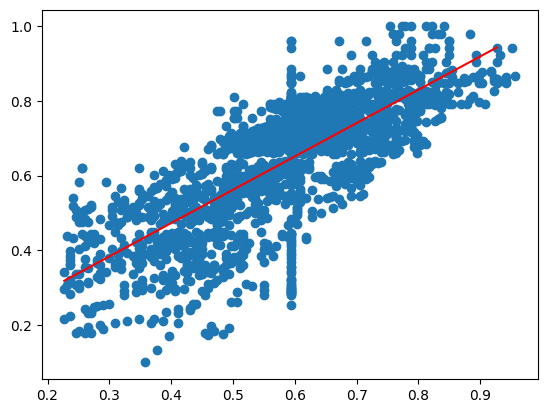

B0:  [[0.11479136]]
B1:  [[0.89434948]]


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
schooling_train_reshaped = features_train["Schooling"].values.reshape(-1,1)
life_train_reshaped = target_train.values.reshape(-1,1)   
model.fit(schooling_train_reshaped,life_train_reshaped)

#Résultat
schooling_array = np.arange(min(filtered_df["Schooling"]),max(filtered_df["Schooling"]),0.1).reshape(-1,1)
life_expectancy_prediction = model.predict(schooling_array)
plt.scatter(schooling_train_reshaped,life_train_reshaped)
plt.plot(schooling_array,life_expectancy_prediction,color="red")
plt.show()
B0 = model.predict([[0]])
B1 = model.coef_
print("B0: ", B0)
print("B1: ", B1)


<h3>Evaluation du modèle</h3>

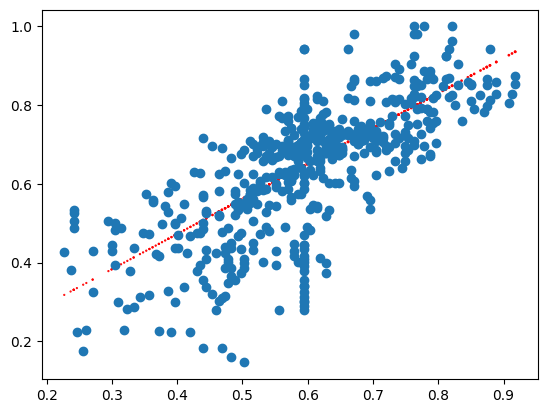

Mean Absolute Error:  0.08575085797187777
Mean Squared Error:  0.013032987108191863
Root Mean Squared Error:  0.11416210889867033
R2 :  0.5262920375143127


In [89]:
life_test_reshaped = target_test.values.reshape(-1,1)
schooling_test_reshaped = features_test["Schooling"].values.reshape(-1,1)
valeurs_prediction = model.predict(schooling_test_reshaped)
plt.scatter(schooling_test_reshaped,valeurs_prediction,valeurs_prediction,c="red")
plt.scatter(schooling_test_reshaped,life_test_reshaped)
plt.show()
print("Mean Absolute Error: ", metrics.mean_absolute_error(life_test_reshaped,valeurs_prediction))
print("Mean Squared Error: ", metrics.mean_squared_error(life_test_reshaped,valeurs_prediction))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(life_test_reshaped, valeurs_prediction)))
print("R2 : ",metrics.r2_score(life_test_reshaped, model.predict(schooling_test_reshaped)))

### Régression linéaire multiple

In [91]:
multiple_reg_data = filtered_df.copy()
X = multiple_reg_data[['Schooling', 'Income composition of resources', 'Adult Mortality']]
y = multiple_reg_data['Life expectancy ']
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
#Predict
predictions = model.predict(X_test)

### Evaluation du modèle

In [92]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

R-squared: 0.6750600359639614
Mean Squared Error: 0.008939977153848186


### Logistic regression

On peut utiliser la regression logistic pour classifier les pays en deux catégories, <strong>developped</strong> ou <strong>developing</strong> .On peut changer les valeurs de la colonne <strong>Status</strong> par des 0 et des 1.
<ul><li>1 pour les pays développés </li><li>0 pour les pays au cours de développement</li></ul>

In [93]:
logistic_reg_data = filtered_df.drop(["Country", "Year"], axis = 1).copy()
#Remplacez les valeurs de la colonne par 0 et 1
logistic_reg_data['Status'] = logistic_reg_data['Status'].replace({'Developing': 0, 'Developed': 1})
logistic_reg_data

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0.544592,0.362881,0.034444,0.000000,0.003659,0.005439,0.209733,0.0332,0.031250,0.649485,0.000000,0.004889,0.619565,0.603509,0.505274,0.487923
1,0,0.447818,0.373961,0.035556,0.000000,0.003774,0.002319,0.203940,0.0344,0.572917,0.618557,0.000000,0.005127,0.630435,0.610526,0.502110,0.483092
2,0,0.447818,0.369806,0.036667,0.000000,0.003759,0.002027,0.198146,0.0356,0.614583,0.639175,0.000000,0.005287,0.637681,0.617544,0.495781,0.478261
3,0,0.440228,0.375346,0.038333,0.000000,0.004014,0.013135,0.192352,0.0372,0.666667,0.670103,0.000000,0.005608,0.644928,0.628070,0.488397,0.473430
4,0,0.434535,0.379501,0.039444,0.000000,0.000364,0.014200,0.187717,0.0388,0.677083,0.680412,0.000000,0.000519,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,0,0.411765,0.551247,0.013889,0.357223,0.000548,0.000000,0.032445,0.0144,0.958333,0.958763,0.132673,0.000919,0.221014,0.207018,0.514768,0.502415
2925,0,0.385199,0.592798,0.014444,0.340426,0.004754,0.000000,0.026651,0.0156,0.958333,0.958763,0.172277,0.008005,0.231884,0.221053,0.489451,0.473430
2930,0,0.195446,0.091413,0.016111,0.216685,0.001531,0.001141,0.315180,0.0184,0.729167,0.731959,0.467327,0.003317,0.293478,0.284211,0.436709,0.463768
2931,0,0.172676,0.008310,0.015556,0.255319,0.001759,0.000999,0.311703,0.0180,0.708333,0.051546,0.528713,0.003467,0.307971,0.298246,0.430380,0.458937


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

X = logistic_reg_data.drop("Status", axis = 1)
y = logistic_reg_data["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report (includes precision, recall, F1-score, and support)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       453
           1       0.78      0.73      0.76        98

    accuracy                           0.92       551
   macro avg       0.86      0.85      0.85       551
weighted avg       0.91      0.92      0.92       551

